In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt 
import seaborn as sns



# Load the  data into feature matrix, class labels, and event ids:

In this section, we will load the data.

In [2]:
from proj1_helpers import *
#Change the path according to where is your data 
DATA_TRAIN_PATH = r"C:\Users\USER\Desktop\MA1\ML\train.csv" 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

DATA_TEST_PATH = r"C:\Users\USER\Desktop\MA1\ML\test.csv" # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [3]:
### Define variables for the dimensions of the data
N = tX.shape[0]
D = tX.shape[1]
N_test=tX_test.shape[0]


# Data Pre-Processing

## Partitioning the Data

In this subsection, we will divide the datasets into three sub-datasets according to their PRI_JET_NUM

In [4]:
#the number of the feature that contains the pri_jet_number
jet_num_col=22

In [5]:
#div data is a table (that will be changed into a numpy) that will contains the datasets according 
#to their pri_jet_num
div_x= [[],[],[]]
div_y=[[],[],[]]

# We do the same for the testing set
div_x_test= [[],[],[]]


In [6]:
#For every data point
for i in range (N):
    #we extract its pri_jet_num
    pri_jet_num=int(tX[i,jet_num_col])
    #we assign it to the new data set based on its pri_jet_num
    if (pri_jet_num in [0,1]): 
        div_x[pri_jet_num].append(tX[i])
        div_y[pri_jet_num].append(y[i])
        
    if (pri_jet_num in [2,3]):
        div_x[2].append(tX[i]) 
        div_y[2].append(y[i])

In [7]:
#For every data point
for i in range (N_test):
    #we extract its pri_jet_num
    pri_jet_num=int(tX_test[i,jet_num_col])
    #we assign it to the new data set based on its pri_jet_num
    if (pri_jet_num in [0,1]): 
        div_x_test[pri_jet_num].append(tX_test[i])
    if (pri_jet_num in [2,3]):
        div_x_test[2].append(tX_test[i])

In [8]:
#transforms an array of 3 arrays into a numpy lists that contains 3 numpy lists
def fromNumpyToList(tab):
    for i in range(3):
        tab[i]=np.array(tab[i])
    return np.array(tab)

In [9]:
div_x= fromNumpyToList(div_x)
div_y= fromNumpyToList(div_y)

div_x_test=fromNumpyToList(div_x_test)

<ipython-input-8-566570f90b78>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(tab)


In [10]:
for i in range(3):
    print("train " +str(i) +" as a pri_jet_num :" +str(div_x[i].shape))
    print("test " +str(i) +" as a pri_jet_num :" +str(div_x_test[i].shape))
    print()


train 0 as a pri_jet_num :(99913, 30)
test 0 as a pri_jet_num :(227458, 30)

train 1 as a pri_jet_num :(77544, 30)
test 1 as a pri_jet_num :(175338, 30)

train 2 as a pri_jet_num :(72543, 30)
test 2 as a pri_jet_num :(165442, 30)



## Deleting Features

In [11]:
#del_features[i] is False if the feature will be deleated

#del_features[i] is for the ith dataset
#del_features[:j] is for the jth feature

del_features= [[],[],[]]

### Undefined Features

In [12]:
#takes as input a list of lists called del_features
#del_features[i] contains a list of the indices of the features to be deleted in i-th dataset 
def f_del_features(del_features):
    for i in range(3):
        div_x[i]=np.delete(div_x[i],del_features[i],axis=1)
        div_x_test[i]=np.delete(div_x_test[i],del_features[i],axis=1)


In [13]:
# We will the features that contain only one values
for i in range (3):
    for j in range(D):
        s= set(div_x[i][:,j])
        if (len(s)<2):
            del_features[i].append(j)

In [14]:
print("deleted features because of the data division")
print()
for i in range(3):
    print ("for the "+str(i)+" th dataset")
    print(str(len(del_features[i]))+" have been deleted which are")
    print(del_features[i])
    print()

deleted features because of the data division

for the 0 th dataset
12 have been deleted which are
[4, 5, 6, 12, 22, 23, 24, 25, 26, 27, 28, 29]

for the 1 th dataset
8 have been deleted which are
[4, 5, 6, 12, 22, 26, 27, 28]

for the 2 th dataset
0 have been deleted which are
[]



In [15]:
f_del_features(del_features)
#We reinitialize del_features
del_features= [[],[],[]]

In [16]:
for i in range(3):
    print("train " +str(i) +" as a pri_jet_num :" +str(div_x[i].shape))
    print("test " +str(i) +" as a pri_jet_num :" +str(div_x_test[i].shape))
    print()


train 0 as a pri_jet_num :(99913, 18)
test 0 as a pri_jet_num :(227458, 18)

train 1 as a pri_jet_num :(77544, 22)
test 1 as a pri_jet_num :(175338, 22)

train 2 as a pri_jet_num :(72543, 30)
test 2 as a pri_jet_num :(165442, 30)



In [17]:
# We will the features that contain only one values
for i in range (3):
    D= div_x[i].shape[1]
    for j in range(0,D):
        s= set(div_x[i][:,j])
        if (len(s)<2):
            print("i :"+ str(i)+" j :"+ str(j))

### Correlated Features

In [18]:
corrs=[[],[],[]]
for i in range(3):
    corrs[i]= np.corrcoef(div_x[i].T)


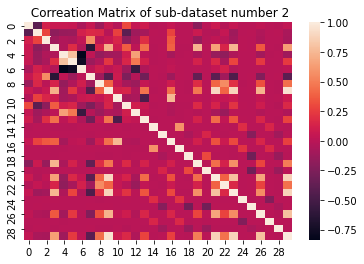

In [19]:
i=2
ax = plt.axes()
sns.heatmap(corrs[i], ax = ax)
ax.set_title(' Correation Matrix of sub-dataset number '+str(i))
plt.savefig('correlation matrix ')
plt.show()


In [20]:
#TODO: hypertune the correlation threshhold

In [21]:
for k in range(3):
    corr=corrs[k]
    D_k=div_x[k].shape[1]
    for i in range(0,D_k):
        for j in range(i+1,D_k):
            if abs(corr[i,j]) >= 0.8:
                if j not in del_features[k]:
                    del_features[k].append(j)                 


In [22]:
print("deleted features because of the Correlation ")
print()
for i in range(3):
    print ("for the "+str(i)+" th dataset")
    print(str(len(del_features[i]))+" have been deleted which are")
    print(del_features[i])
    print()

deleted features because of the Correlation 

for the 0 th dataset
2 have been deleted which are
[5, 9]

for the 1 th dataset
3 have been deleted which are
[6, 18, 21]

for the 2 th dataset
4 have been deleted which are
[6, 21, 23, 29]



In [23]:
f_del_features(del_features)
#We reinitialize del_features
del_features= [[],[],[]]

In [24]:
for i in range(3):
    print("train " +str(i) +" as a pri_jet_num :" +str(div_x[i].shape))
    print("test " +str(i) +" as a pri_jet_num :" +str(div_x_test[i].shape))
    print()

train 0 as a pri_jet_num :(99913, 16)
test 0 as a pri_jet_num :(227458, 16)

train 1 as a pri_jet_num :(77544, 19)
test 1 as a pri_jet_num :(175338, 19)

train 2 as a pri_jet_num :(72543, 26)
test 2 as a pri_jet_num :(165442, 26)



In [25]:
for i in range(3):
    corrs[i]= np.corrcoef(div_x[i].T)
for k in range(3):
    corr=corrs[k]
    D_k=div_x[k].shape[1]
    for i in range(D_k):
        for j in range(i+1,D_k):
            if abs(corr[i,j]) >= 0.8:
                print("i :"+ str(i)+" j :"+ str(j))

## All Together

In [26]:
### Transform tX by changing -999 with the mean of column
def transformTX(tX):
    N=tX.shape[0]
    D=tX.shape[1]
    tX2 = np.copy(tX)
    tX2[tX2 == -999] = 0
    means = np.mean(tX2, axis=0)
    for i in range(N):
        for j in range(D):
            if tX[i][j] == -999:
                tX[i][j] = means[j]
    return tX

In [27]:
# tX[i] gives you the ith row, therefore the ith data point
# tX[:,j] gives you the jth feature 
def rescaling(tX):
    N=tX.shape[0]
    D= tX.shape[1]
    for n_feat in range(D):
        data=tX[:,n_feat]
        tX[:,n_feat]=(data - np.min(data)) / (np.max(data) - np.min(data))
    return tX

In [28]:
### Apply log to smoothen data
def log(tX):
    N=tX.shape[0]
    D=tX.shape[1]
    for i in range(D):
        for k in range(N):
                tX[k][i] = np.log(1+tX[k][i])
    return tX

In [29]:
### Apply log to smoothen data
def maybeAddLog(tX):
    N= tX.shape[0]
    D= tX.shape[1]
    tX2 = np.copy(tX)
    mins = np.min(tX2, axis=0)
    for i in range(D):
        if mins[i]>0:
            for k in range(N):
                tX[k][i] = np.log(tX[k][i])
    return tX

In [30]:
def standarize(tX):
        N=tX.shape[0]
        D=tX.shape[1]
        tX2 = np.copy(tX)
        mean = np.mean(tX2, axis=0)
        std = np.std(tX2, axis=0)
        for i in range(D):
                for k in range(N):
                    tX[k][i] = (tX[k][i] -mean[i])/std[i]
        return tX


In [31]:
### Features Expansion to capture non linear data
def featuresExpansion(degree, tX):
    N=tX.shape[0]
    D=tX.shape[1]
    res = np.zeros(N).reshape(-1,1)
    for i in range(D):
        for d in range(1,degree+1):
            col = tX[:,i]**d
            col = col.reshape(-1,1)
            res = np.hstack((res, col))
    res = np.delete(res, 0,1)
    return res

In [32]:
def transformations(x,deg):
    for i in range (3):
        x[i] = featuresExpansion(deg[i], 
                                 maybeAddLog(
                                 transformTX(x[i])))

In [33]:
def transformations_2(x,deg):
    for i in range (3):
        x[i] = featuresExpansion(deg, 
                                 standarize(
                                 log(
                                 rescaling(
                                 transformTX(x[i])))))

In [34]:
deg = 7
transformations_2(div_x,deg)
transformations_2(div_x_test,deg)

# Linear Regression

Remark: We are assuming that we DO NOT have an offset and that w = {w1, w2, ... , wD} where D=30 in our case

In [35]:
### Helper function to select a small set of data (Given in lab2)
def batch_iter(y, tx, batch_size, num_batches=1, shuffle=True):
    """
    Generate a minibatch iterator for a dataset.
    Takes as input two iterables (here the output desired values 'y' and the input data 'tx')
    Outputs an iterator which gives mini-batches of `batch_size` matching elements from `y` and `tx`.
    Data can be randomly shuffled to avoid ordering in the original data messing with the randomness of the minibatches.
    """
    data_size = len(y)

    if shuffle:
        shuffle_indices = np.random.permutation(np.arange(data_size))
        shuffled_y = y[shuffle_indices]
        shuffled_tx = tx[shuffle_indices]
    else:
        shuffled_y = y
        shuffled_tx = tx
    for batch_num in range(num_batches):
        start_index = batch_num * batch_size
        end_index = min((batch_num + 1) * batch_size, data_size)
        if start_index != end_index:
            yield shuffled_y[start_index:end_index], shuffled_tx[start_index:end_index]

In [94]:
### Loss function that we use (this function is not used directly but only its gradient)
def compute_loss_lin(y, tX, w):
    #Calculate the loss using mse
    N= tX.shape[0]
    D=tX.shape[1]
    e = y - (tX @ w)
    return (1/(2*N)) * (e.T @ e)

In [95]:
### Compute the gradient
def compute_gradient_lin(y, tX, w):
    N= tX.shape[0]
    D=tX.shape[1]
    e = y - (tX @ w)
    return (-1/N) * (tX.T @ e)

In [96]:
### Gradient descent algorithm: the function returns best w
def least_squares_GD(y, tX, initial_w, max_iters, gamma):
    N= tX.shape[0]
    D=tX.shape[1]
    w = initial_w
    for _ in range(max_iters):
        grad = compute_gradient_lin(y,tX,w)
        w = w - gamma * grad
    return w

In [80]:
batch_size_linear = 1

In [81]:
### Stochastic gradient descent algorithm: the function returns best w
def least_squares_SGD(y, tX, initial_w, max_iters, gamma):
    N= tX.shape[0]
    D=tX.shape[1]
    iterate = next(batch_iter(y, tX, batch_size_linear, num_batches=1, shuffle=True))
    y1 = iterate[0]
    tX1 = iterate[1]
    w = initial_w
    for n_iter in range(max_iters):
        grad = compute_gradient_lin(y1,tX1,w)
        w = w - gamma * grad
    return w

In [82]:
### Least squares regression using normal equations
def least_squares(y, tX):
    N= tX.shape[0]
    D=tX.shape[1]
    return np.linalg.solve(tX.T@tX,tX.T@y)

# Ridge Regression

In [86]:
### Ridge regression using normal equations 
def ridge_regression(y, tX, lambda_):
    N= tX.shape[0]
    D=tX.shape[1]
    lambda_prime = 2 * N * lambda_
    identity = np.eye(D)
    LHS = (tX.T@tX) + lambda_prime*identity
    RHS = tX.T@y
    
    return np.linalg.solve(LHS, RHS)

# Logistic Regression

In [43]:
### Helper function to compute sigmoid
def sigmoid(t):
    """apply sigmoid function on t."""
    return 1.0 / (1 + np.exp(-t))

In [44]:
def compute_logistic_loss(y, tX, w):
    """compute the cost by negative log likelihood."""
    N= tX.shape[0]
    D=tX.shape[1]
    val = y.T @ np.log(sigmoid(tx@w)) + (1-y.T) @ np.log(1-sigmoid(tx@w))
    return np.squeeze(- val)

In [45]:
### Compute the gradient of  
def compute_gradient_log(y, tx, w):
    return tx.T @ (sigmoid(tx@w) - y)

In [46]:
### Logistic regression using gradient descent
def logistic_regression_GD(y, tx, initial_w, max_iters, gamma):
    w = initial_w
    for _ in range(max_iters):
        gradient = compute_gradient_log(y, tx, w)
        w = w - gamma * gradient
    
    return w

In [47]:
batch_size_log = 1

In [48]:
### Logisitic regression using stochastic gradient descent 
def logistic_regression_SGD(y, tx, initial_w, max_iters, gamma):
    N= tX.shape[0]
    D=tX.shape[1]

    iterate = next(batch_iter(y, tx, batch_size_log, num_batches=1, shuffle=True))
    y1 = iterate[0]
    tx1 = iterate[1]
    w = initial_w
    
    for _ in range(max_iters):
        gradient = compute_gradient_log(y1, tx1, w)
        w = w - gamma * gradient
        
    return w    

# Regularized Logistic Regression

In [49]:
### Compute regularized gradient
def compute_gradient_reg(y, tx, w, lambda_):
    return compute_gradient_log(y, tx, w) + lambda_*w

In [50]:
### Regularized Logistic regression using gradient descent
def reg_logistic_regression_GD(y, tx, lambda_, initial_w, max_iters, gamma):
    w = initial_w
    for _ in range(max_iters):
        gradient = compute_gradient_reg(y, tx, w, lambda_)
        w = w - gamma * gradient
    return w

In [51]:
batch_size_reg = 1

In [52]:
### Regularized Logisitic regression using stochastic gradient descent 
def reg_logistic_regression_SGD(y, tx, lambda_, initial_w, max_iters, gamma):
    iterate = next(batch_iter(t, tx, batch_size_reg, num_batches=1, shuffle=True))
    y1 = iterate[0]
    tx1 = iterate[1]
    w = initial_w
    
    for _ in range(max_iters):
        gradient = compute_gradient_reg(y1, tx1, w, lambda_)
        w = w - gamma * gradient
        
    return w 

# Prediction logistic regression

In [53]:
def predict_labels_logistic(weights, data):
    """Generates class predictions given weights, and a test data matrix on a logistic regression"""
    y_pred = np.dot(data, weights)
    for i in range(len(y_pred)):
        y_pred[i] = sigmoid(y_pred[i])
    y_pred[np.where(y_pred < 0.5)] = -1
    y_pred[np.where(y_pred >= 0.5)] = 1
    
    return y_pred

# Cross validation

In [54]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    N= y.shape[0]
    num_row = N
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

In [98]:
def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te = y[te_indice]
    y_tr = y[tr_indice]
    x_te = x[te_indice]
    x_tr = x[tr_indice]
    
    # ridge regression
    #w = ridge_regression(y_tr, x_tr, lambda_)
    
    w = least_squares(y_tr, x_tr)
    # Linear GD
    #w = least_squares_GD(y_tr, x_tr, np.zeros(x_tr.shape[1]), 50, lambda_)
    y_pred_tr = predict_labels(w, x_tr) 
    y_pred_te = predict_labels(w, x_te)
    # Compare y_pred with y_te
    acc_tr = 0
    acc_te = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == y_pred_tr[i]:
            acc_tr += 1
    acc_tr = acc_tr/y_tr.shape[0]
    for i in range(y_te.shape[0]):
        if y_te[i] == y_pred_te[i]:
            acc_te += 1
    acc_te = acc_te/y_te.shape[0]
    
    return acc_tr, acc_te, w

In [99]:
### Defining variables
seed = 6 
k_fold = 4
lambdas = np.logspace(-4, 0, 30)

In [100]:
degree=6

In [101]:
from plots import cross_validation_visualization

def cross_validation_demo(n_pri_jet):
    # split data in k fold
    y=div_y[n_pri_jet]
    tX= div_x[n_pri_jet]
    k_indices = build_k_indices(y, k_fold, seed)
    
    # define lists to store the loss of training data and test data
    mean_acc_tr = []
    mean_acc_te = []
    
    # cross validation
    for lambda_ in lambdas:
        mean_acc_tr_tmp = []
        mean_acc_te_tmp = []
        
        for k in range(k_fold):
            acc_tr, acc_te,_ = cross_validation(y, tX, k_indices, k, lambda_, degree)
            mean_acc_tr_tmp.append(acc_tr)
            mean_acc_te_tmp.append(acc_te)
        mean_acc_tr.append(np.mean(mean_acc_tr_tmp))
        mean_acc_te.append(np.mean(mean_acc_te_tmp))
    print(max(mean_acc_te))
    cross_validation_visualization(lambdas, mean_acc_tr, mean_acc_te)


0.8411001681479702
0.7985401836376768
0.8241108354011579


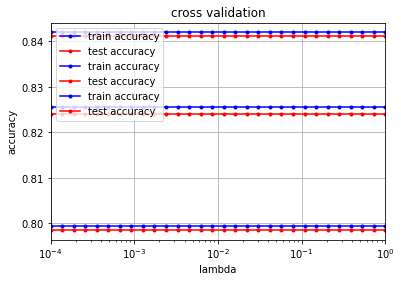

In [102]:
for j in range(3):
    cross_validation_demo(j)

# Generate predictions and save ouput in csv format for submission:

In [57]:
OUTPUT_PATH = r"C:\Users\USER\Desktop\MA1\ML\output.csv" # TODO: fill in desired name of output file for submission

In [52]:
for i in range(3):
    print('train')
    print(div_x[i].shape)
    print(div_y[i].shape)
    print()
    print('test')
    print(div_x_test[i].shape)
    print()

train
(99913, 112)
(99913,)

test
(227458, 112)

train
(77544, 133)
(77544,)

test
(175338, 133)

train
(72543, 182)
(72543,)

test
(165442, 182)



In [53]:
###IF WE ARE USING LEAST_SQUARES 
weights= [[],[],[]]
pred=  [[],[],[]]
for i in range(3):
    weights[i] = least_squares(div_y[i],div_x[i])
    pred[i] = predict_labels(weights[i],div_x_test[i] )

In [54]:
y_pred= []
ctr= [0,0,0]
for i in range(N_test):
    pri_jet_num=int(tX_test[i,jet_num_col])
    if (pri_jet_num in [0,1]): 
        idx= ctr[pri_jet_num]
        ctr[pri_jet_num]+=1
        x= pred[pri_jet_num][idx]
        y_pred.append(x)
    if (pri_jet_num in [2,3]):
        idx= ctr[2]
        ctr[2]+=1
        x= pred[2][idx]
        y_pred.append(x)
    


In [55]:
len(y_pred)

568238

In [73]:
###IF WE ARE USING LOGISTIC REGRESSION
y[y == -1] = 0  #We set y's where it is -1 to 0 in order to work with probabilities
initial_w = np.random.randint(-1000, 1000, D)
max_iters = 1000
gamma = 1e-10
weights = logistic_regression_GD(y, tX, initial_w, max_iters, gamma)
y_pred = predict_labels_logistic(weights, tX_test)

<ipython-input-52-336880a42340>:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-t))


In [58]:
#Create submission
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)